In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
df = pd.read_json("013_results_slavic_asr.jsonl", orient="records", lines=True).drop_duplicates(subset=["eval_file", "clip_seconds"])
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"], row["y_pred"]), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"], row["y_pred"], average="macro"), axis=1)
df.tail()

,output_column,model_name_or_path,eval_file,clip_seconds,train_config,y_true,y_pred,accuracy,macroF1
5,Speaker_name,/home/peterr/macocu/task11/models/classla_wav2...,003_speaker_id_test_for_datasets.csv,-1,{'model_name_or_path': 'classla/wav2vec2-large...,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",1.000,1.000000
6,Speaker_name,/home/peterr/macocu/task11/models/classla_wav2...,003_speaker_id_dev_for_datasets.csv,2,{'model_name_or_path': 'classla/wav2vec2-large...,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",0.998,0.997995
7,Speaker_name,/home/peterr/macocu/task11/models/classla_wav2...,003_speaker_id_test_for_datasets.csv,2,{'model_name_or_path': 'classla/wav2vec2-large...,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",1.000,1.000000
8,Speaker_age_group,/home/peterr/macocu/task11/models/classla_wav2...,006_age_dev.csv,-1,{'model_name_or_path': 'classla/wav2vec2-large...,"[old, old, old, old, old, old, old, old, old, ...","[young, young, young, young, young, young, you...",0.679,0.677280
9,Speaker_age_group,/home/peterr/macocu/task11/models/classla_wav2...,006_age_test.csv,-1,{'model_name_or_path': 'classla/wav2vec2-large...,"[old, old, old, old, old, old, old, old, old, ...","[old, young, old, old, old, young, young, youn...",0.722,0.721715


In [3]:
subset = df.loc[df.output_column=="Party_status", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()

# print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

| accuracy   | macroF1   |
|------------|-----------|


,,accuracy,macroF1
eval_file,clip_seconds,,


In [ ]:
subset = df.loc[df.output_column=="Party_status", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()

#print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

In [ ]:
y_true, y_pred = df.loc[1, ["y_true", "y_pred"]]


In [ ]:
df.loc[1, :]

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Party status, test split\nAccuracy: 0.59")
plt.savefig("images/012_cm_party_status_test_15_epochs.png")
plt.savefig("images/012_cm_party_status_test_15_epochs.pdf")
plt.show()

In [6]:
subset = df.loc[df.output_column=="Speaker_age_group", [ "eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()
# print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

|                          |   accuracy |   macroF1 |
|:-------------------------|-----------:|----------:|
| ('006_age_dev.csv', -1)  |      0.679 |  0.67728  |
| ('006_age_test.csv', -1) |      0.722 |  0.721715 |


,,accuracy,macroF1
eval_file,clip_seconds,,
006_age_dev.csv,-1,0.679,0.677280
006_age_test.csv,-1,0.722,0.721715


In [7]:
df.loc[3, :]

output_column                                            Speaker_gender
model_name_or_path    /home/peterr/macocu/task11/models/classla_wav2...
eval_file                                           001_gender_test.csv
clip_seconds                                                          2
train_config          {'model_name_or_path': 'classla/wav2vec2-large...
y_true                [F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...
y_pred                [F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...
accuracy                                                          0.985
macroF1                                                        0.984997
Name: 3, dtype: object

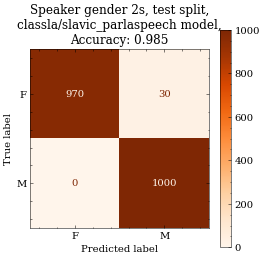

In [10]:
y_true, y_pred = df.loc[3, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Speaker gender 2s, test split,\nclassla/slavic_parlaspeech model,\nAccuracy: 0.985")
plt.savefig("images/013_cm_speaker_gender_test.png")
plt.savefig("images/013_cm_speaker_gender_test.pdf")
plt.show()

In [11]:
df.loc[9, :]

output_column                                         Speaker_age_group
model_name_or_path    /home/peterr/macocu/task11/models/classla_wav2...
eval_file                                              006_age_test.csv
clip_seconds                                                         -1
train_config          {'model_name_or_path': 'classla/wav2vec2-large...
y_true                [old, old, old, old, old, old, old, old, old, ...
y_pred                [old, young, old, old, old, young, young, youn...
accuracy                                                          0.722
macroF1                                                        0.721715
Name: 9, dtype: object

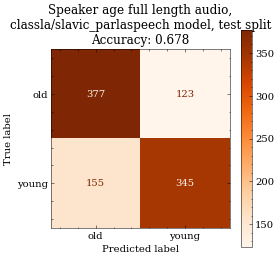

In [12]:
y_true, y_pred = df.loc[9, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Speaker age full length audio,\nclassla/slavic_parlaspeech model, test split\nAccuracy: 0.678")
plt.savefig("images/013_cm_speaker_age_test.png")
plt.savefig("images/013_cm_speaker_age_test.pdf")
plt.show()

In [13]:
test = pd.read_csv(df.loc[9, "eval_file"])

test["y_pred"] = df.loc[9, "y_pred"]
test["y_true"] = df.loc[9, "y_true"]
test["missclassified"] = test.y_pred != test.y_true

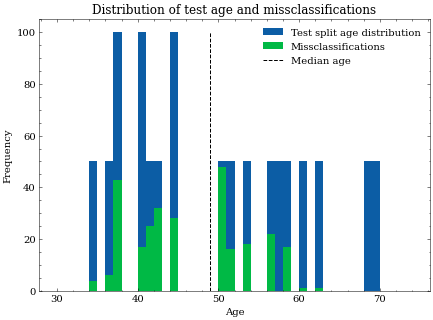

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.hist(bins=r, ax=ax, label="Test split age distribution")
test.Speaker_age_at_recording[test.missclassified].plot.hist(bins=r, ax=ax, label="Missclassifications")
ax.vlines(49, 0, 100, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
plt.title("Distribution of test age and missclassifications")

fname = "images/013_age_missclassifications_histogram"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


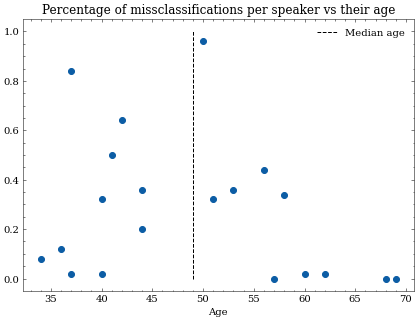

In [15]:
gb = test.groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    })

x = gb.Speaker_age_at_recording
y = gb.missclassified


fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x,y)
ax.vlines(49, 0, 1, linestyles="dashed", label="Median age")
ax.set_xlabel("Age")
plt.legend()
ax.set_title("Percentage of missclassifications per speaker vs their age")

fname = "images/013_age_missclassifications_percentages_scatter"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


In [ ]:
test.columns

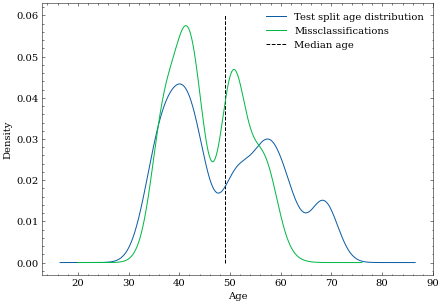

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.kde(
    # bins=r, 
    ax=ax, 
    label="Test split age distribution"
    )
test.Speaker_age_at_recording[test.missclassified].plot.kde(
    # bins=r, 
    ax=ax, 
    label="Missclassifications"
    )
ax.vlines(49, 0, 0.06, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
plt.show()


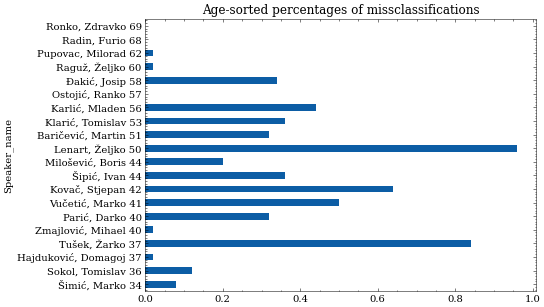

In [17]:
new_names = test.Speaker_name+" "+ test.Speaker_age_at_recording.astype(int).astype(str)
gb = test.assign(Speaker_name=new_names).groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    }).sort_values("Speaker_age_at_recording", ascending=True)
gb

x = gb.missclassified
y = gb.index


fig, ax = plt.subplots(figsize=(7, 5))

gb.missclassified.plot.barh(ax=ax)

plt.title("Age-sorted percentages of missclassifications")

fname = "images/013_age_missclassifications_percentages_by_speaker_barh"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()